In [1]:
!pwd

/home/ubuntu/Yang_Sahana/diabetic-retinopathy-detection


In [2]:
!ls

diabetic.ipynb


In [7]:
import os
import pandas as pd
import numpy as np
#from medpy.io import load
from matplotlib import pyplot as plt
import glob
import scipy
import cv2
import matplotlib.image as mpimg


%matplotlib inline

In [8]:
rootDir = "/home/ubuntu/Yang_Sahana/train/"
# rootDir = "/Users/yangliu/Desktop/ga_new_cap/"
ls_file = []
for root, dirs, files in os.walk(rootDir):
    for fileName in files:
        if fileName.endswith('.jpeg'):
            ls_file.append(fileName)

In [9]:
len(ls_file)

35126

In [10]:
ls_file[0]

'21793_left.jpeg'

In [12]:
img1 = mpimg.imread('/home/ubuntu/Yang_Sahana/train/' + ls_file[0])
img2 = mpimg.imread('/home/ubuntu/Yang_Sahana/train/' + ls_file[2])
# img1 = mpimg.imread('ga_new_cap/sample/' + ls_file[0])
# img2 = mpimg.imread('ga_new_cap/sample/' + ls_file[2])

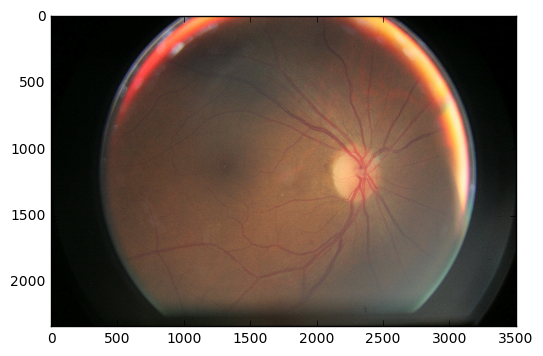

In [13]:
plt.imshow(img1)

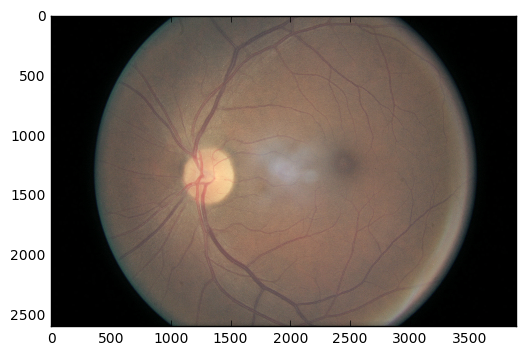

In [14]:
plt.imshow(img2)

In [15]:
img1.shape

(2336, 3504, 3)

In [16]:
img2.shape

(2592, 3888, 3)

In [42]:
def find_border_dynamic_threshold(image, axis):
    im_array = np.sum(np.sum(image, axis=axis), axis=1)
    threshold = im_array.max() /1000
    indices = np.where(im_array > threshold)
    return indices[0][0], indices[0][-1]

In [43]:
def crop_img(img):
# finding min max indices
    min_x, max_x = find_border_dynamic_threshold(img, 0)
    min_y, max_y = find_border_dynamic_threshold(img, 1)
# crop
    image = img[min_y:max_y, min_x:max_x]
    return image

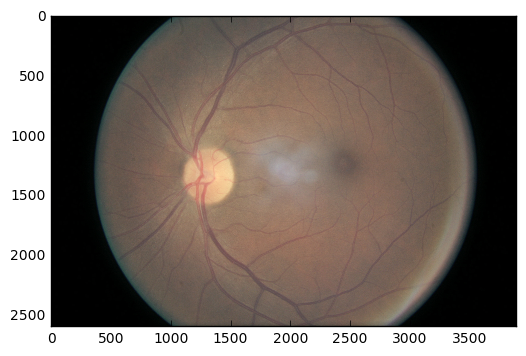

In [46]:
#crop different sizes
plt.imshow(crop_img(img2))

In [19]:
#reshape
def reshape_img(filename, dimension): 
#     img = mpimg.imread('/Users/yangliu/Desktop/ga_new_cap/sample/' + filename)
    img = mpimg.imread('/home/ubuntu/Yang_Sahana/train/' + filename)
    image = cv2.resize(crop_img(img),(dimension,dimension))
    return image

In [24]:
#create .data file for different sizes
def memap_arry(*args): #img_file,dimension
    #create memmap object
    #begin = time.time()
    #print "Started:", char
    img_file = args[0]
    dimension = args[1]
    tmp_char_array = reshape_img(img_file, dimension)
#     char_mmap = np.memmap(dtype='float64', filename= '/Users/yangliu/Desktop/ga_new_cap/' + str(dimension) + '_train/' + img_file.split('.')[0] +'.data', mode='w+', shape=tmp_char_array.shape)
#     char_mmap[:, :] = tmp_char_array
#     char_mmap_path = '/Users/yangliu/Desktop/ga_new_cap/'+ str(dimension) + '_train/' + img_file.split('.')[0] +'.data' #hard codes foler name
    char_mmap = np.memmap(dtype='float64', filename= '/home/ubuntu/Yang_Sahana/' + str(dimension) + '_train/' + img_file.split('.')[0] +'.data', mode='w+', shape=tmp_char_array.shape)
    char_mmap[:, :] = tmp_char_array
    char_mmap_path = '/home/ubuntu/Yang_Sahana/'+ str(dimension) + '_train/' + img_file.split('.')[0] +'.data' #hard codes foler name

In [21]:
#resize after crop

In [ ]:
###########do not do this manual for now, working on the Pool######

In [38]:
#create 3 directories 128,256,512
#start with 128
for i in ls_file:
    memap_arry(i, 128)

KeyboardInterrupt: 

In [126]:
for i in ls_file:
    memap_arry(i, 256)

In [127]:
for i in ls_file:
    memap_arry(i, 512)

In [34]:
[128 for i in range(len(ls_file))]

35126

In [ ]:
#use Pool to multitask

In [37]:
from multiprocessing import Pool
import time
import multiprocessing

begin = time.time()
pool = Pool(multiprocessing.cpu_count())
pool.map(memap_arry, zip(ls_file[10],[128 for i in range(len(ls_file[10]))]))
print time.time() - begin

OSError: [Errno 12] Cannot allocate memory

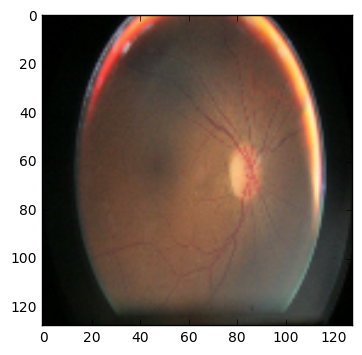

In [40]:
#plot after crop and resize
plt.imshow(cv2.resize(crop_img(img1),(128,128)))

In [23]:
!pwd

/home/ubuntu/Yang_Sahana/diabetic-retinopathy-detection


In [ ]:
#read in .data file

In [183]:
import mmap
rootDir = '/Users/yangliu/Desktop/ga_new_cap/128_train/'
file_dict = {
    'name':[],
    'pic': []}
for root, dirs, files in os.walk(rootDir):
    for fileName in files:
        if fileName.endswith('.data'):
            file_dict['name'].append(fileName.split('.')[0])
            file_dict['pic'].append(np.memmap('/Users/yangliu/Desktop/ga_new_cap/128_train/' + fileName,shape=(128,128,3)))
image_df = pd.DataFrame(file_dict)

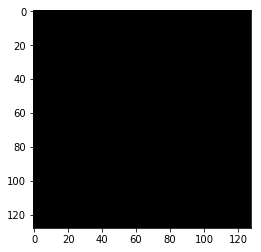

In [185]:
plt.imshow(image_df.pic[1])

In [ ]:
#build model for different sizes

In [63]:
labels = pd.read_csv('/Users/yangliu/Desktop/ga_new_cap/trainLabels.csv')

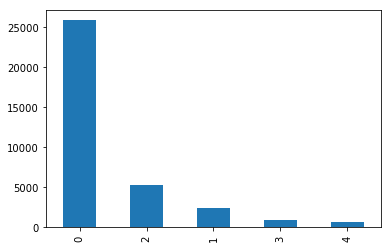

In [80]:
labels['level'].value_counts().plot(kind='bar')